# Lec 31: Hierarchical Clustering
## CMSE 381 - Fall 2022
## Dec 5, 2022


<img src="https://docs.scipy.org/doc/scipy/_images/scipy-cluster-hierarchy-dendrogram-1_01.png" alt="Dendrogram" width="600"/>

In [26]:
# Everyone's favorite standard imports
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import time




I've made us some data, easy case first, where we've got data that I made drawing from three clusters. You can probably look at the picture and figure out what they should be. 

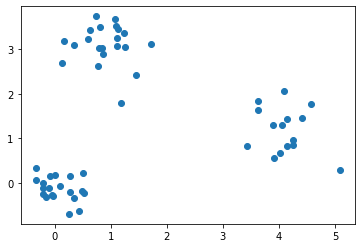

In [27]:
X = np.loadtxt('Clustering-ToyData.csv')
plt.scatter(X[:,0],X[:,1])

But notice that when I look at the order the points are included in the matrix, it's got nothing to do with the order that the points came in the matrix.

Text(0.5, 1.0, 'Colored by order of points in the matrix')

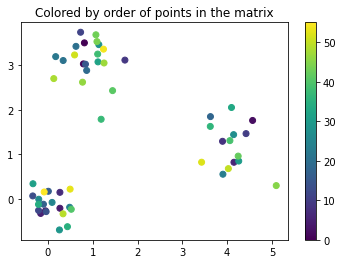

In [28]:
plt.scatter(X[:,0],X[:,1], c = list(range(X.shape[0])))
plt.colorbar()
plt.title('Colored by order of points in the matrix')

The next thing we can do is look at the *distance matrix* of the points, which is a square matrix for which entry `D[i,j]` is the distance between points `i` and `j`. 

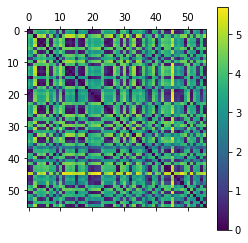

In [29]:
from scipy.spatial import distance_matrix

D = distance_matrix(X,X)

plt.matshow(D)
plt.colorbar()

There are lots of controls in that function including messing with the choice of distances between the points, but for now we'll leave it at the good ol' fashioned Euclidean distance, 
$$
\| x - y \| = \sqrt{ \sum_k (x_k-y_k)^2 }.
$$

Before we go on, here's a trick for figuring out where a particular data point is.

Distance: 3.7599211068694047


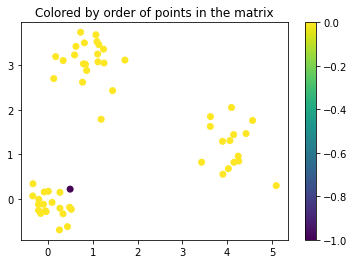

In [31]:
# I want to find point 53

colors = np.zeros(X.shape[0])
colors[53] = -1 #<--- Make the color of point 53 different from the others

plt.scatter(X[:,0],X[:,1], c = colors)
plt.colorbar()
plt.title('Colored by order of points in the matrix')
print('Distance:', D[18,7])

&#9989; **<font color=red>Answer these:</font>** 
- Where are the 7th and 18th (according to python numbering) points in the scatter plot above? 
- Are they in the same cluster (based on eyeballing it) or different clusters?
- What is the distance between the 7th and 18th points? Use the distance matrix to figure it out 


Distance: 3.7599211068694047


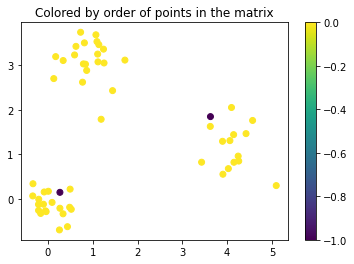

In [32]:
# Your code here #
colors = np.zeros(X.shape[0])
colors[7] = -1
colors[18] = -1

plt.scatter(X[:,0],X[:,1], c = colors)
plt.colorbar()
plt.title('Colored by order of points in the matrix')
print('Distance:', D[18,7])

I can also play around with looking at the connections like in class, where we connect up points within distance $r$ of each other.  Mess around with the $r$ value below to see what changes. Be careful: large $r$ values wil make for slow drawing.

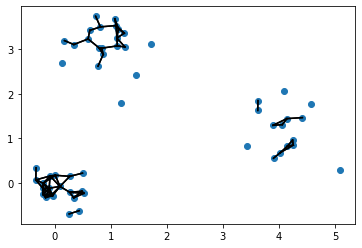

In [33]:
plt.scatter(X[:,0],X[:,1])

r = 0.3

for i in range(X.shape[0]):
    for j in range(X.shape[0]):
        if D[i,j] <= r:
            p = X[(i,j),:]
            plt.plot(p[:,0],p[:,1],c = 'black')

This matrix is very helpful for understanding distances, however, my code in just a moment is going to need the `condensed` distance matrix. It turns out that it has the same information as the above distance matrix, just flattened out. For our purposes, you won't need to fully understand this but the curious can go check out the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html).

In [34]:
from scipy.spatial.distance import pdist

P = pdist(X)
P.shape

(1540,)

And with that, we can get `scipy` to compute our dendrogram for us!

In [35]:
from scipy.cluster import hierarchy

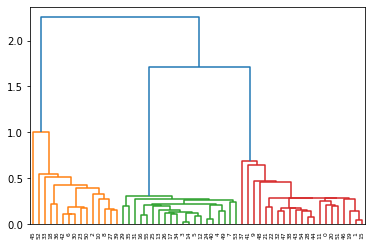

In [36]:
Z = hierarchy.linkage(pdist(X), 'single')

plt.figure()

dn = hierarchy.dendrogram(Z)


First thing to notice, it automatically gives me some color visual guesses for what it thinks the threshold should be for clustering. Hunting around in the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html), it turns out it chooses this threshold based on some information in the linkage diagram......

In [37]:
h = 0.7*max(Z[:,2])  #<---- this equation is what it uses to pick the cutoff
print('Chosen threshold:', h)

Chosen threshold: 1.5807771169466314


,,,but we can also control the cutoff that it draws the colors

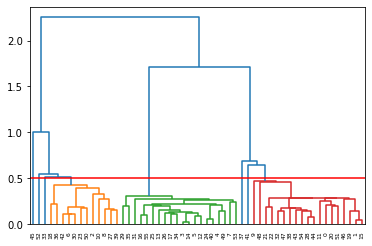

In [38]:
thresh_height = 0.5

dn = hierarchy.dendrogram(Z, color_threshold = thresh_height)
plt.axhline(y = thresh_height, color = 'r', linestyle = '-')

&#9989; **<font color=red>Q:</font>** How many clusters are there if we have a cutoff of 2.0? What about for 0.5?


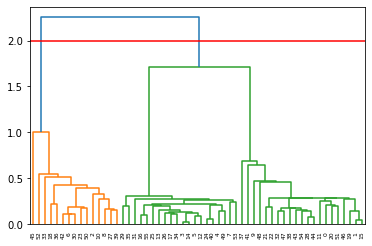

In [39]:
# Your code here #
thresh_height = 2

dn = hierarchy.dendrogram(Z, color_threshold = thresh_height)
plt.axhline(y = thresh_height, color = 'r', linestyle = '-')

Now the magic is that we have the ability to extract the clusters based on the chosen threshold. 

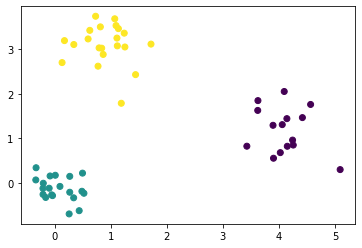

In [40]:
colors = hierarchy.fcluster(Z,h,criterion = 'distance')

plt.scatter(X[:,0],X[:,1],c = colors)


&#9989; **<font color=red>Q:</font>** Where are the clusters associated to a threshold of 2.0? What about 0.5?


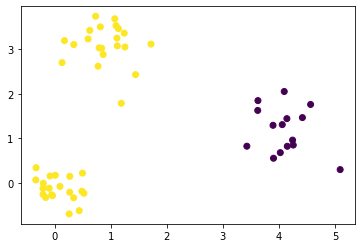

In [41]:
# Your code here #
colors = hierarchy.fcluster(Z,2,criterion = 'distance')

plt.scatter(X[:,0],X[:,1],c = colors)

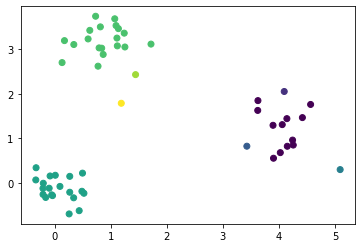

In [42]:
# Your code here #
colors = hierarchy.fcluster(Z,0.5,criterion = 'distance')

plt.scatter(X[:,0],X[:,1],c = colors)

## A nastier example

I made another data set that's a bit more ambiguous. How many clusters are there? 2? 3? Ok, ok, let's not fight about it. I actually made it using three centers of a normal distribution, but one could argue whether there's two cleanly split clusters, or whether this is related to density and therefore there are 3. 

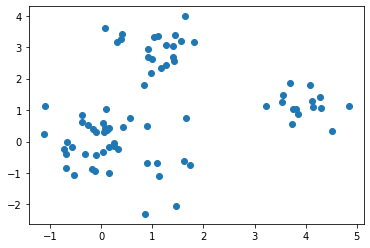

In [43]:
X = np.loadtxt('Clustering-ToyData2.csv')
plt.scatter(X[:,0],X[:,1])

&#9989; **<font color=red>Q:</font>** Draw the single linkage cluster dendogram as above. 
- Is there a reasonable choice of threshold? 
- Using this threshold, how many clusters are there? 
- Draw the cluster assignments on the points using some choice of threshold, reasonable or not. 


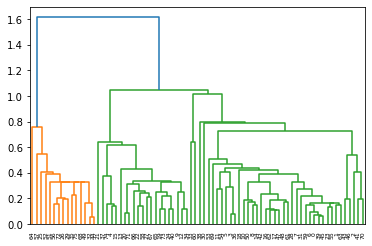

In [44]:
# Your code here #
Z = hierarchy.linkage(pdist(X), 'single')

plt.figure()

dn = hierarchy.dendrogram(Z)

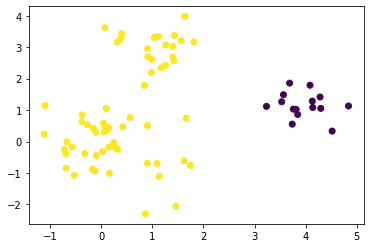

In [45]:
colors = hierarchy.fcluster(Z,1.2,criterion = 'distance')

plt.scatter(X[:,0],X[:,1],c = colors)

Now, we can mess with the choice of linkage to see how this changes the clustering assignment. 



&#9989; **<font color=red>Q:</font>** Modify your linkage to use `complete` instead of `single` and draw the resulting dendrogram.
- Is there a reasonable choice of threshold? 
- Using this threshold, how many clusters are there? 
- Draw the cluster assignments on the points using some choice of threshold, reasonable or not. 


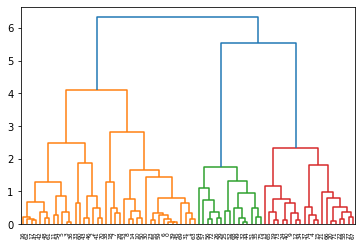

In [46]:
# Your code here #
Z = hierarchy.linkage(pdist(X), 'complete')

plt.figure()

dn = hierarchy.dendrogram(Z)

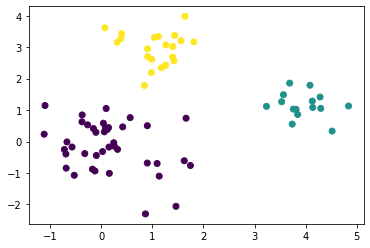

In [47]:
colors = hierarchy.fcluster(Z,5,criterion = 'distance')

plt.scatter(X[:,0],X[:,1],c = colors)



-----
### Congratulations, we're done!
Written by Dr. Liz Munch, Michigan State University

<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.